In [1]:
import pandas as pd

In [72]:
df = pd.read_csv('../data/javascript/package-json.csv')
len(df)

1072119

In [73]:
df.head()

,repo_name,license,description,dependencies
0,LockwoodSoftware/football,mit,NaN,body-parser|cookie-parser|debug|express|jade|m...
1,mattmcmanus/atom-ember-snippets,mit,Ember.js ES6 Snippets for Atom,atom-package-deps
2,MatthiasKainer/robbie-the-robot,agpl-3.0,NaN,@types/async|@types/body-parser|@types/cookie-...
3,xiewulong/express-auto-server,mit,express auto server,body-parser|cookie-parser|express|express-auto...
4,tameemsafi/uk-tax-calculator,gpl-3.0,NaN,@types/object-assign


In [76]:
deps = df.set_index('repo_name').dependencies.str.split('|').explode()

In [77]:
deps

repo_name
LockwoodSoftware/football        body-parser
LockwoodSoftware/football      cookie-parser
LockwoodSoftware/football              debug
LockwoodSoftware/football            express
LockwoodSoftware/football               jade
                                   ...      
Wifsimster/datagamer                 unirest
Wifsimster/datagamer                   unzip
Wifsimster/datagamer                 winston
hvenables/thermostat_tueday          express
behavejs/behave-events                     q
Name: dependencies, Length: 9125109, dtype: object

In [78]:
deps.value_counts()

express         268029
lodash          158436
body-parser     141378
react           105915
request          93930
                 ...  
sham                 3
shapeways            3
share-auth           3
share-wisdom         3
@ephox/robin         3
Name: dependencies, Length: 121385, dtype: int64

In [79]:
import re
topic_pat = re.compile(r'@?(\w+)/.*')
def dep_to_topic(s: str) -> str:
    if m := topic_pat.fullmatch(s):
        return m.group(1)
    return s

In [83]:
topics = deps.fillna('').apply(dep_to_topic)

In [84]:
topics.value_counts()

express            268029
angular            252453
lodash             158436
body-parser        141378
react              105942
                    ...  
roundate                3
routa                   3
route-active            3
route-analytics         3
oscar-ui                3
Name: dependencies, Length: 113699, dtype: int64

In [89]:
%matplotlib inline

In [101]:
topic_counts = topics.value_counts()

<AxesSubplot:>

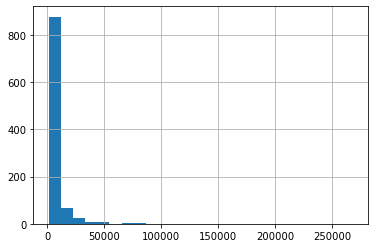

In [103]:
topic_counts[:1000].hist(bins=25)

In [104]:
topic_counts.describe()

count    113699.000000
mean         80.256722
std        1708.150176
min           3.000000
25%           3.000000
50%           3.000000
75%          12.000000
max      268029.000000
Name: dependencies, dtype: float64

In [106]:
topic_counts.quantile([.75, .8, .85, .9, .95, .99])

0.75     12.0
0.80     15.0
0.85     24.0
0.90     42.0
0.95    111.0
0.99    852.0
Name: dependencies, dtype: float64

In [107]:
sum(topic_counts >= 100)

6065